### import important libraries

In [1]:
## libraries for reading and manipulating data
import pandas as pd
import numpy as np

## libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

## libraries for splitting data
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score

## libraries for imbalance dataset
from imblearn.over_sampling import SMOTE 
from imblearn.under_sampling import RandomUnderSampler

## libraries for computing accuracy score
from sklearn.metrics import (make_scorer,f1_score, accuracy_score, recall_score, precision_score,
                            confusion_matrix, roc_auc_score)

## library for data scaling
from sklearn.preprocessing import StandardScaler

## library for hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV


## model building 
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ( AdaBoostClassifier, GradientBoostingClassifier, 
                              RandomForestClassifier, BaggingClassifier
)
from xgboost import XGBClassifier

## suppress warnings 
import warnings
warnings.filterwarnings("ignore")

In [2]:
train_generator_data = pd.read_csv('train.csv')
test_generator_data = pd.read_csv('test.csv')

In [3]:
## creating a copy of the data
df_train = train_generator_data.copy()
df_test= test_generator_data.copy()

In [ ]:
## lets preview our train data
df_train.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V32,V33,V34,V35,V36,V37,V38,V39,V40,Target
0,-4.464606,-4.679129,3.101546,0.506130,-0.221083,-2.032511,-2.910870,0.050714,-1.522351,3.761892,...,3.059700,-1.690440,2.846296,2.235198,6.667486,0.443809,-2.369169,2.950578,-3.480324,0
1,3.365912,3.653381,0.909671,-1.367528,0.332016,2.358938,0.732600,-4.332135,0.565695,-0.101080,...,-1.795474,3.032780,-2.467514,1.894599,-2.297780,-1.731048,5.908837,-0.386345,0.616242,0
2,-3.831843,-5.824444,0.634031,-2.418815,-1.773827,1.016824,-2.098941,-3.173204,-2.081860,5.392621,...,-0.257101,0.803550,4.086219,2.292138,5.360850,0.351993,2.940021,3.839160,-4.309402,0
3,1.618098,1.888342,7.046143,-1.147285,0.083080,-1.529780,0.207309,-2.493629,0.344926,2.118578,...,-3.584425,-2.577474,1.363769,0.622714,5.550100,-1.526796,0.138853,3.101430,-1.277378,0
4,-0.111440,3.872488,-3.758361,-2.982897,3.792714,0.544960,0.205433,4.848994,-1.854920,-6.220023,...,8.265896,6.629213,-10.068689,1.222987,-3.229763,1.686909,-2.163896,-3.644622,6.510338,0


In [5]:
## lets preview our test data
df_test.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V32,V33,V34,V35,V36,V37,V38,V39,V40,Target
0,-0.613489,-3.819640,2.202302,1.300420,-1.184929,-4.495964,-1.835817,4.722989,1.206140,-0.341909,...,2.291204,-5.411388,0.870073,0.574479,4.157191,1.428093,-10.511342,0.454664,-1.448363,0
1,0.389608,-0.512341,0.527053,-2.576776,-1.016766,2.235112,-0.441301,-4.405744,-0.332869,1.966794,...,-2.474936,2.493582,0.315165,2.059288,0.683859,-0.485452,5.128350,1.720744,-1.488235,0
2,-0.874861,-0.640632,4.084202,-1.590454,0.525855,-1.957592,-0.695367,1.347309,-1.732348,0.466500,...,-1.318888,-2.997464,0.459664,0.619774,5.631504,1.323512,-1.752154,1.808302,1.675748,0
3,0.238384,1.458607,4.014528,2.534478,1.196987,-3.117330,-0.924035,0.269493,1.322436,0.702345,...,3.517918,-3.074085,-0.284220,0.954576,3.029331,-1.367198,-3.412140,0.906000,-2.450889,0
4,5.828225,2.768260,-1.234530,2.809264,-1.641648,-1.406698,0.568643,0.965043,1.918379,-2.774855,...,1.773841,-1.501573,-2.226702,4.776830,-6.559698,-0.805551,-0.276007,-3.858207,-0.537694,0


### Understanding The Dataset

In [6]:
## lets the check the number of cols and rows for train data
print(f"Total Number Of Rows: {df_train.shape[0]} -> Total Number Of Cols: {df_train.shape[1]}")

Total Number Of Rows: 20000 -> Total Number Of Cols: 41


In [7]:
## lets the check the number of cols and rows for test data
print(f"Total Number Of Rows: {df_test.shape[0]} -> Total Number Of Cols: {df_test.shape[1]}")

Total Number Of Rows: 5000 -> Total Number Of Cols: 41


In [8]:
## findng a summary description of the train data
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 41 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V1      19982 non-null  float64
 1   V2      19982 non-null  float64
 2   V3      20000 non-null  float64
 3   V4      20000 non-null  float64
 4   V5      20000 non-null  float64
 5   V6      20000 non-null  float64
 6   V7      20000 non-null  float64
 7   V8      20000 non-null  float64
 8   V9      20000 non-null  float64
 9   V10     20000 non-null  float64
 10  V11     20000 non-null  float64
 11  V12     20000 non-null  float64
 12  V13     20000 non-null  float64
 13  V14     20000 non-null  float64
 14  V15     20000 non-null  float64
 15  V16     20000 non-null  float64
 16  V17     20000 non-null  float64
 17  V18     20000 non-null  float64
 18  V19     20000 non-null  float64
 19  V20     20000 non-null  float64
 20  V21     20000 non-null  float64
 21  V22     20000 non-null  float64
 22

In [9]:
## findng a summary description of the test data
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 41 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V1      4995 non-null   float64
 1   V2      4994 non-null   float64
 2   V3      5000 non-null   float64
 3   V4      5000 non-null   float64
 4   V5      5000 non-null   float64
 5   V6      5000 non-null   float64
 6   V7      5000 non-null   float64
 7   V8      5000 non-null   float64
 8   V9      5000 non-null   float64
 9   V10     5000 non-null   float64
 10  V11     5000 non-null   float64
 11  V12     5000 non-null   float64
 12  V13     5000 non-null   float64
 13  V14     5000 non-null   float64
 14  V15     5000 non-null   float64
 15  V16     5000 non-null   float64
 16  V17     5000 non-null   float64
 17  V18     5000 non-null   float64
 18  V19     5000 non-null   float64
 19  V20     5000 non-null   float64
 20  V21     5000 non-null   float64
 21  V22     5000 non-null   float64
 22  

In [ ]:
## lets check the number of duplicates in the train data
df_train.duplicated().sum()

np.int64(0)

In [11]:
## lets check the number of duplicates in the test data
df_test.duplicated().sum()

np.int64(0)

In [12]:
## lets check for missing values in the train data
df_train.isnull().sum()

V1        18
V2        18
V3         0
V4         0
V5         0
V6         0
V7         0
V8         0
V9         0
V10        0
V11        0
V12        0
V13        0
V14        0
V15        0
V16        0
V17        0
V18        0
V19        0
V20        0
V21        0
V22        0
V23        0
V24        0
V25        0
V26        0
V27        0
V28        0
V29        0
V30        0
V31        0
V32        0
V33        0
V34        0
V35        0
V36        0
V37        0
V38        0
V39        0
V40        0
Target     0
dtype: int64

In [13]:
## lets check for missing values in the test data
df_test.isnull().sum()

V1        5
V2        6
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
V29       0
V30       0
V31       0
V32       0
V33       0
V34       0
V35       0
V36       0
V37       0
V38       0
V39       0
V40       0
Target    0
dtype: int64

Observations
- There are 20,000 rows in the training set and 5000 rows in the rest with 41 columns
- Not much information from the data, since the data is encrypted.
- The columns V1 and V2 have missings values from both the training and test dataset.
- There are no duplicate values

# Exploratory Data Analysis

### Target Variable Analysis For Train Dataset


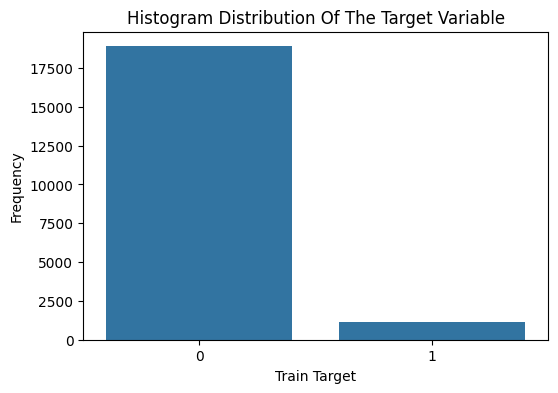

In [14]:
plt.figure(figsize=(6, 4))

sns.countplot(data=df_train, x="Target")

plt.title('Histogram Distribution Of The Target Variable')
plt.xlabel('Train Target')
plt.ylabel('Frequency')

plt.show()

The insight gathered from the figure shows that the data is inbalance. Meaning having more 0s than 1s.

In [15]:
## lets get the counts for each class of the target variable
df_train['Target'].value_counts()

Target
0    18890
1     1110
Name: count, dtype: int64

### Test Data Target Variable Analysis

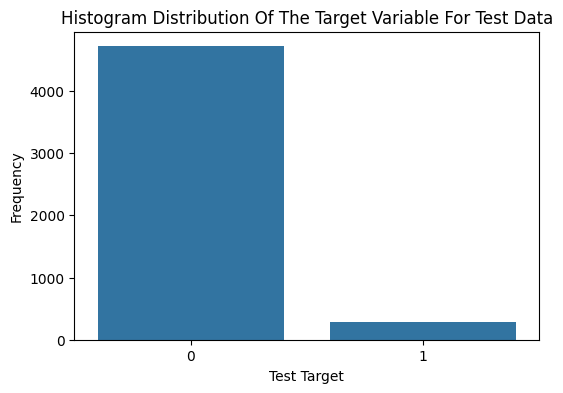

In [16]:
plt.figure(figsize=(6, 4))

sns.countplot(data=df_test, x="Target")
plt.title('Histogram Distribution Of The Target Variable For Test Data')
plt.xlabel('Test Target')
plt.ylabel('Frequency')

plt.show()

In [17]:
## lets get the counts for each class of the target variable
df_test['Target'].value_counts()

Target
0    4718
1     282
Name: count, dtype: int64

The data from the Target column is imbalance.

### Descriptive Analysis
This involves summarizing and understanding the main features of a dataset. This type of analysis provides insights into the data's distribution, central tendency, variability, and relationships between variables

In [18]:
## computing the summary statistics on train data
df_train.describe().round().T

,count,mean,std,min,25%,50%,75%,max
V1,19982.0,-0.0,3.0,-12.0,-3.0,-1.0,2.0,15.0
V2,19982.0,0.0,3.0,-12.0,-2.0,0.0,3.0,13.0
V3,20000.0,2.0,3.0,-11.0,0.0,2.0,5.0,17.0
V4,20000.0,-0.0,3.0,-15.0,-2.0,-0.0,2.0,13.0
V5,20000.0,-0.0,2.0,-9.0,-2.0,-0.0,1.0,8.0
V6,20000.0,-1.0,2.0,-10.0,-2.0,-1.0,0.0,7.0
V7,20000.0,-1.0,2.0,-8.0,-2.0,-1.0,0.0,8.0
V8,20000.0,-1.0,3.0,-16.0,-3.0,-0.0,2.0,12.0
V9,20000.0,-0.0,2.0,-9.0,-1.0,-0.0,1.0,8.0
V10,20000.0,-0.0,2.0,-10.0,-1.0,0.0,1.0,8.0


In [19]:
## computing the summary statistics on test data
df_test.describe().round().T

,count,mean,std,min,25%,50%,75%,max
V1,4995.0,-0.0,3.0,-12.0,-3.0,-1.0,2.0,14.0
V2,4994.0,0.0,3.0,-11.0,-2.0,0.0,2.0,14.0
V3,5000.0,3.0,3.0,-9.0,0.0,2.0,5.0,15.0
V4,5000.0,-0.0,3.0,-15.0,-2.0,-0.0,2.0,12.0
V5,5000.0,-0.0,2.0,-8.0,-2.0,-0.0,1.0,8.0
V6,5000.0,-1.0,2.0,-9.0,-2.0,-1.0,0.0,5.0
V7,5000.0,-1.0,2.0,-8.0,-2.0,-1.0,0.0,8.0
V8,5000.0,-1.0,3.0,-12.0,-3.0,-0.0,2.0,10.0
V9,5000.0,0.0,2.0,-7.0,-1.0,-0.0,1.0,9.0
V10,5000.0,0.0,2.0,-8.0,-1.0,0.0,2.0,7.0


### Correlation Analysis
Correlation analysis is a statistical method used to measure and analyze the strength and direction of the linear relationship between two numerical variables. This method helps to identify how closely related two variables are and whether changes in one variable are associated with changes in another

In [20]:
## selecting only numerical columns from the train data
numerical_train_data = df_train.select_dtypes(exclude=[object])

In [21]:
## compute pearson correlation
corr_matrix = numerical_train_data.corrwith(numerical_train_data['Target'])
corr_matrix

V1        0.073307
V2       -0.000946
V3       -0.213855
V4        0.110786
V5       -0.100525
V6        0.000237
V7        0.236907
V8        0.135996
V9        0.008124
V10      -0.051263
V11       0.196715
V12      -0.021807
V13      -0.139718
V14       0.117586
V15       0.249118
V16       0.230507
V17       0.085314
V18      -0.293340
V19       0.053897
V20       0.070803
V21       0.256411
V22      -0.134727
V23       0.071042
V24      -0.091242
V25      -0.001440
V26      -0.180469
V27       0.014891
V28       0.207359
V29       0.108342
V30       0.038867
V31      -0.136951
V32      -0.032793
V33      -0.102548
V34       0.153854
V35      -0.145603
V36      -0.216453
V37      -0.004769
V38       0.003584
V39      -0.227264
V40       0.007802
Target    1.000000
dtype: float64

In [22]:
## selecting only numerical columns from the test data
numerical_test_data = df_test.select_dtypes(exclude=[object])

In [23]:
## compute pearson correlation 
corr_matrix = numerical_test_data.corrwith(numerical_test_data['Target'])
corr_matrix

V1        0.065983
V2       -0.003076
V3       -0.218073
V4        0.111737
V5       -0.090702
V6        0.012480
V7        0.224378
V8        0.133286
V9       -0.005388
V10      -0.054234
V11       0.188537
V12      -0.028324
V13      -0.174878
V14       0.100623
V15       0.255764
V16       0.222012
V17       0.106458
V18      -0.271856
V19       0.053085
V20       0.073303
V21       0.260405
V22      -0.131882
V23       0.066794
V24      -0.068502
V25       0.001399
V26      -0.192716
V27       0.000121
V28       0.222712
V29       0.125078
V30       0.051768
V31      -0.134423
V32      -0.028957
V33      -0.090985
V34       0.145652
V35      -0.137913
V36      -0.218888
V37      -0.000708
V38       0.012683
V39      -0.243499
V40       0.024421
Target    1.000000
dtype: float64

### Plotting Histograms And Boxplots For All The Variables

In [24]:
# function to plot a boxplot and a histogram along the same scale.

def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

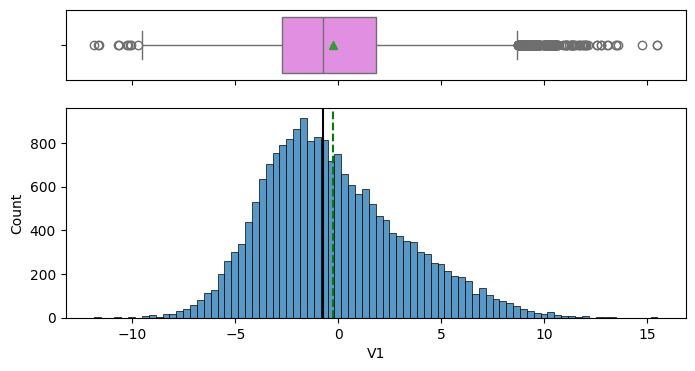

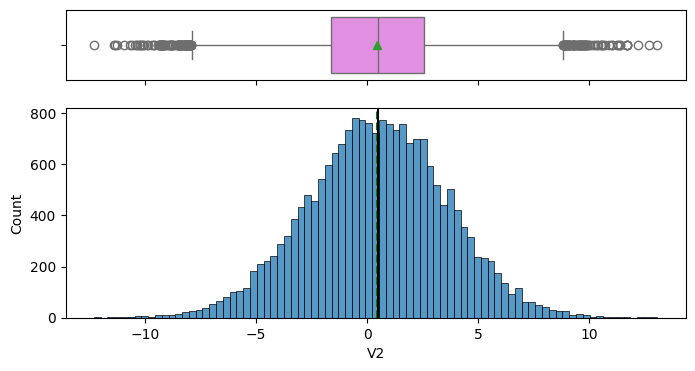

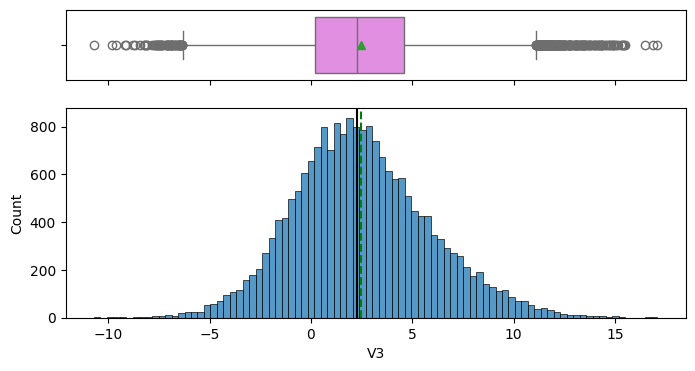

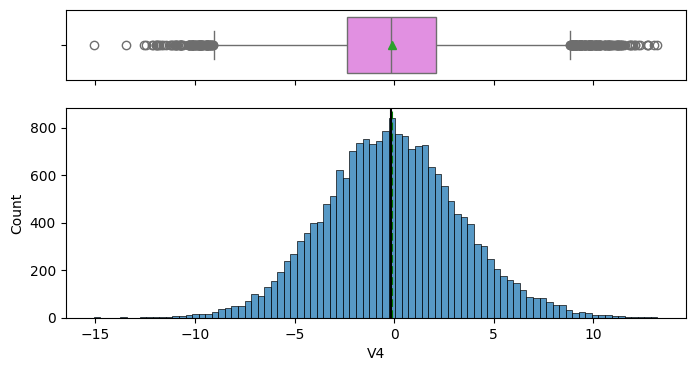

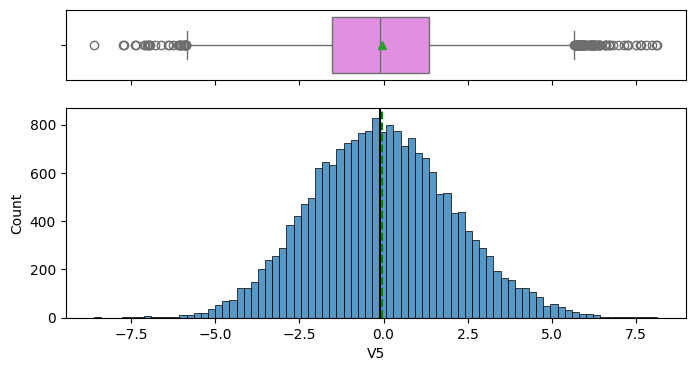

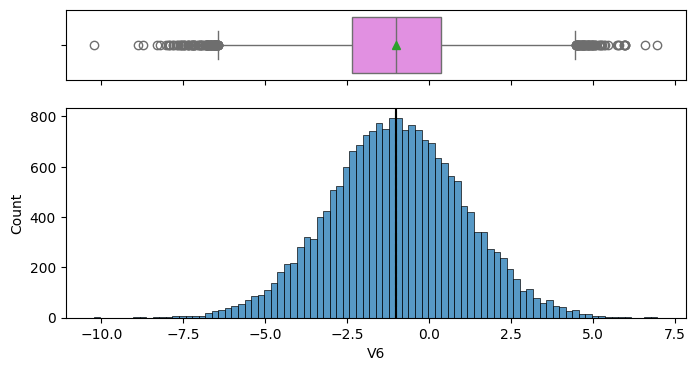

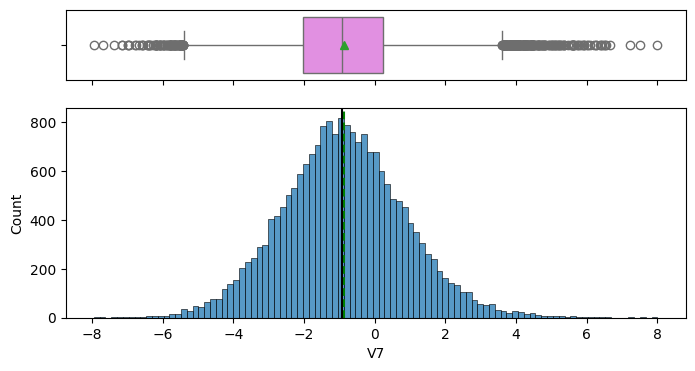

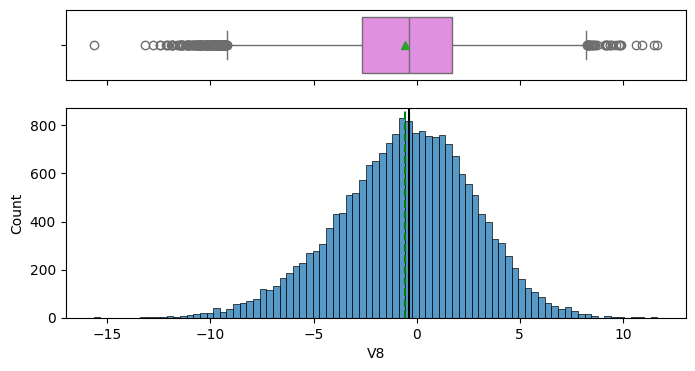

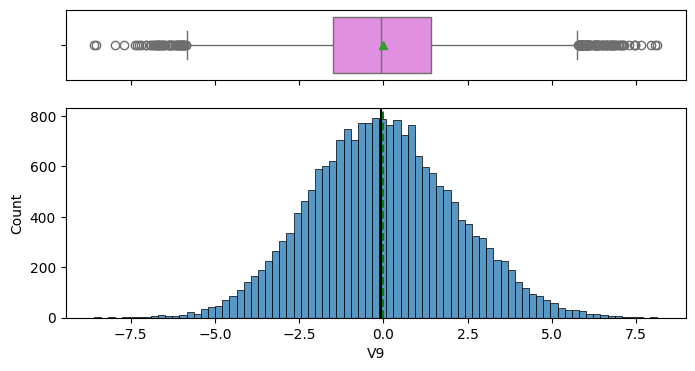

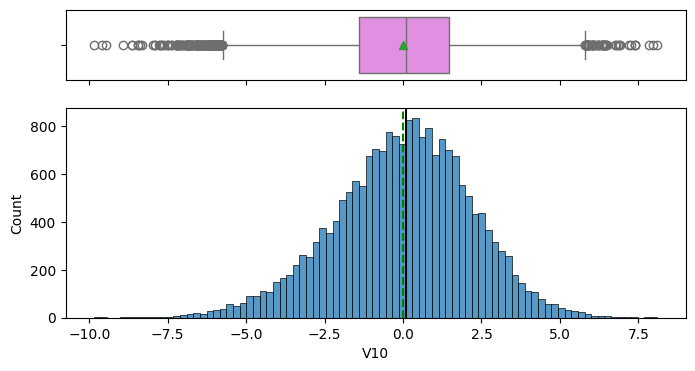

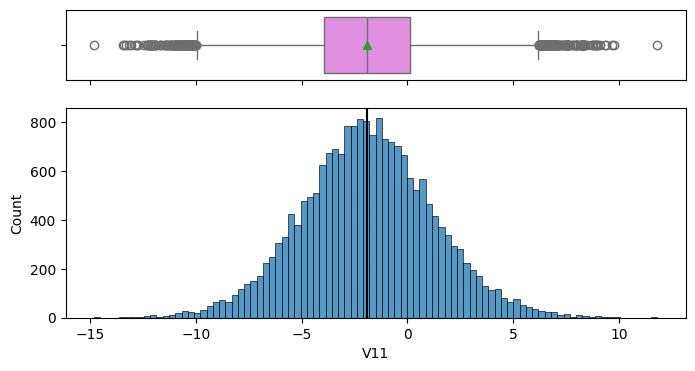

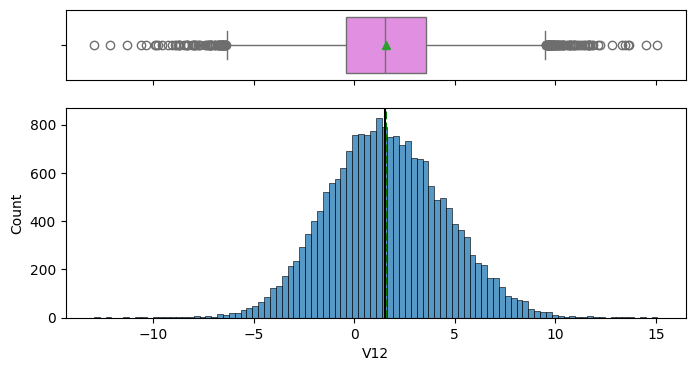

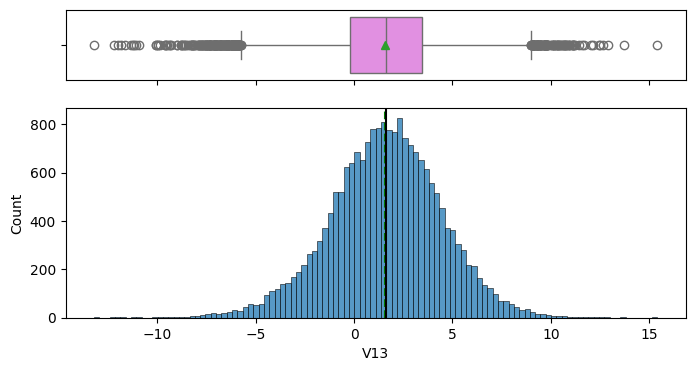

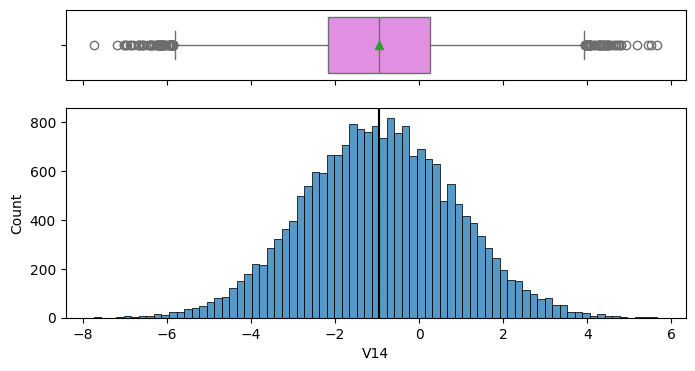

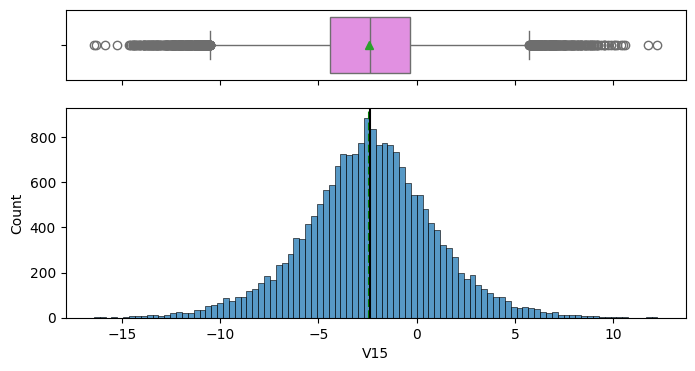

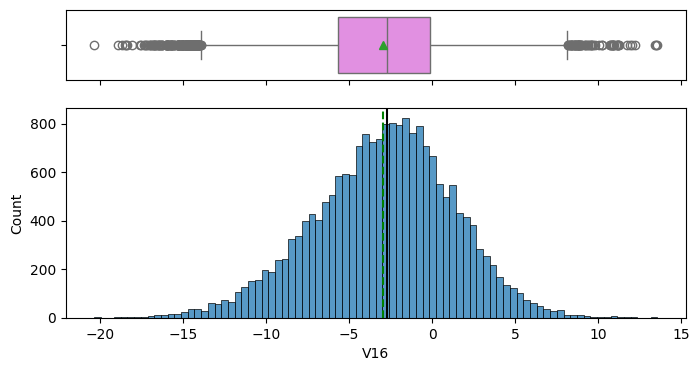

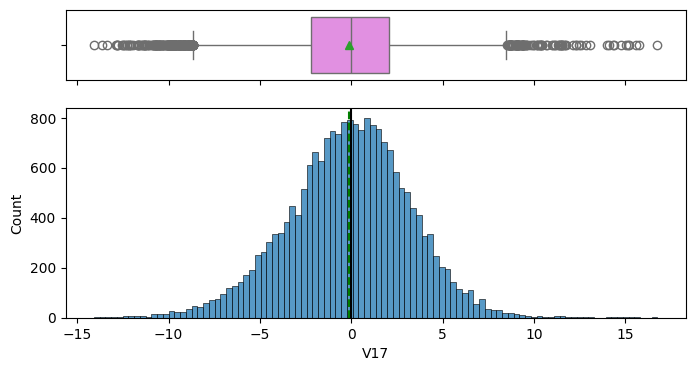

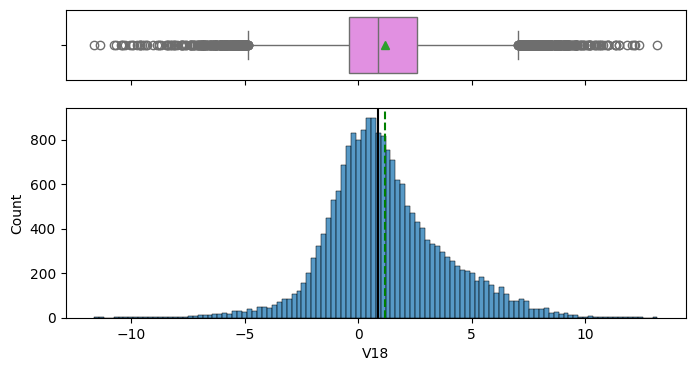

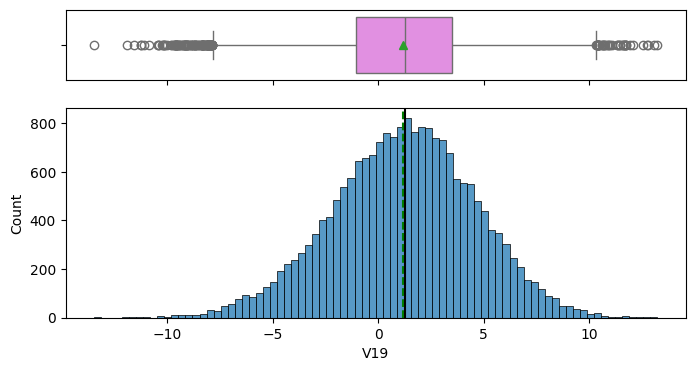

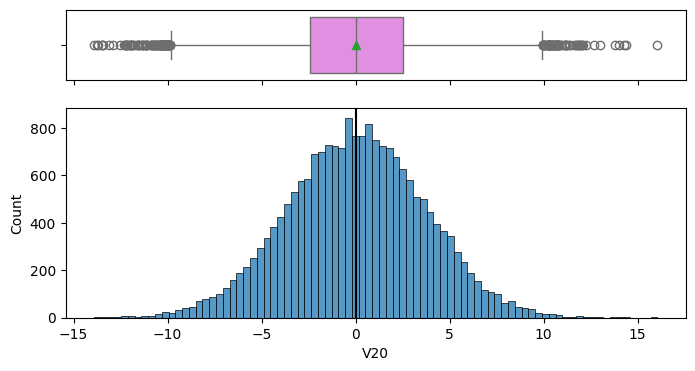

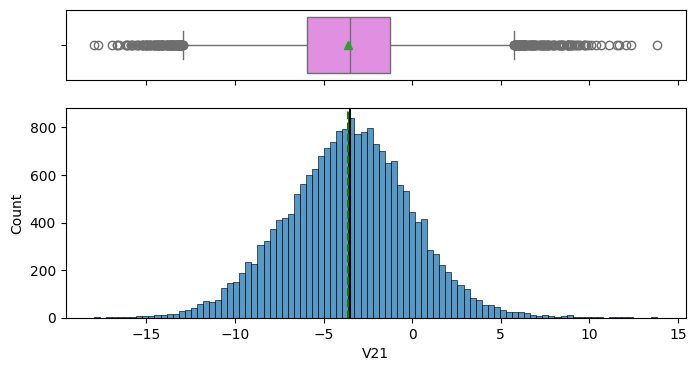

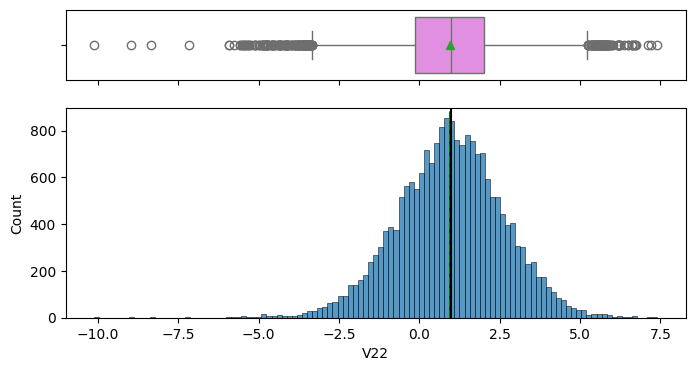

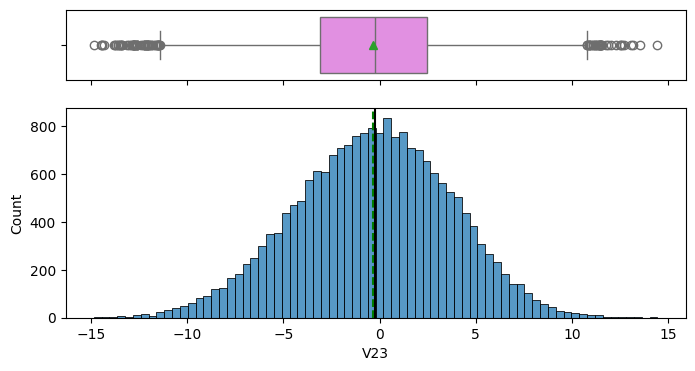

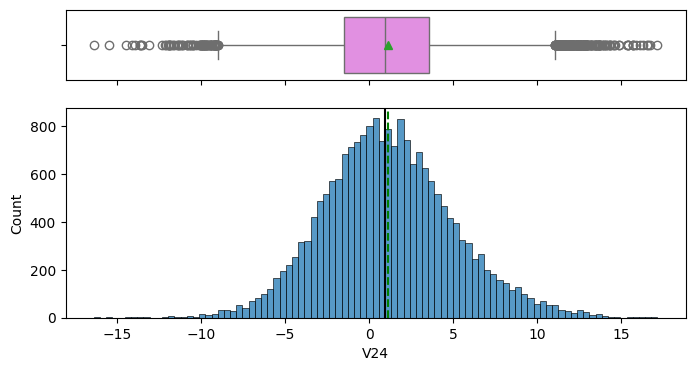

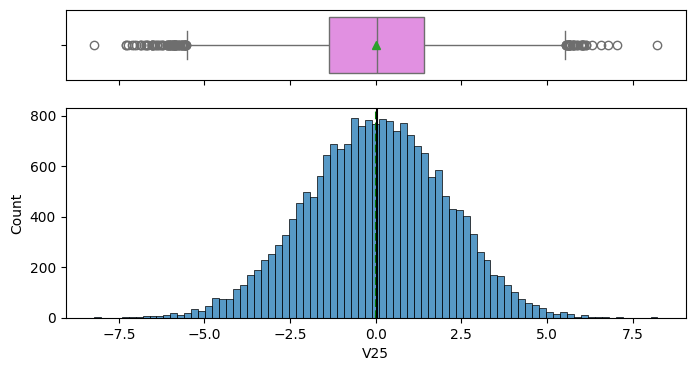

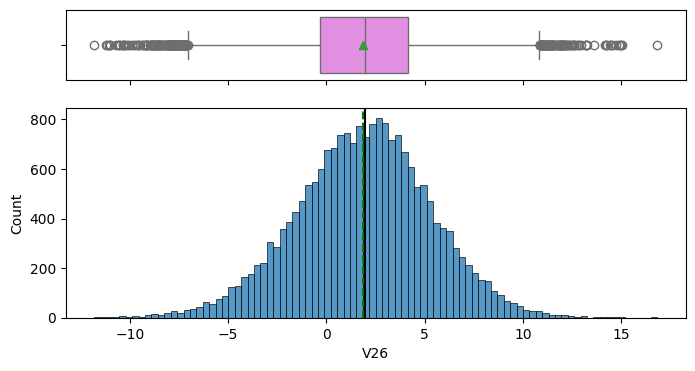

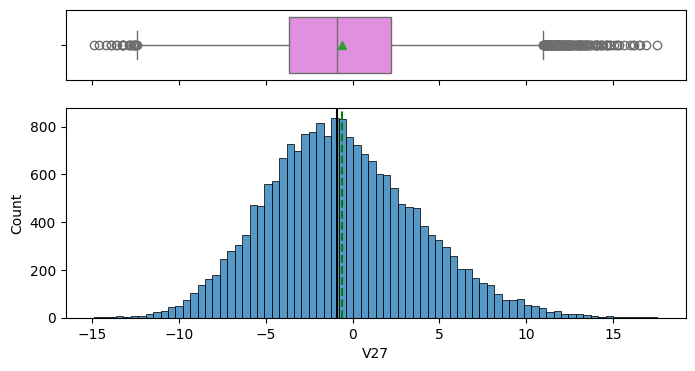

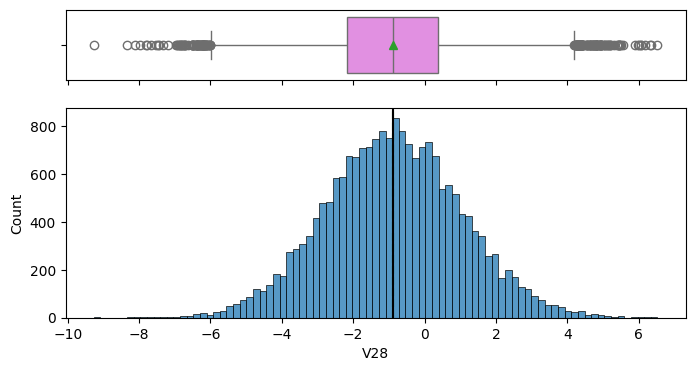

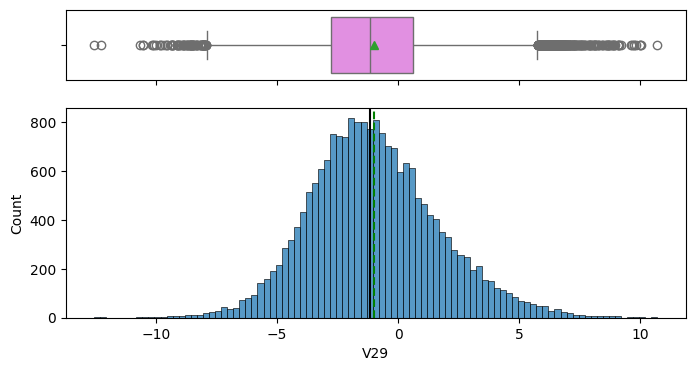

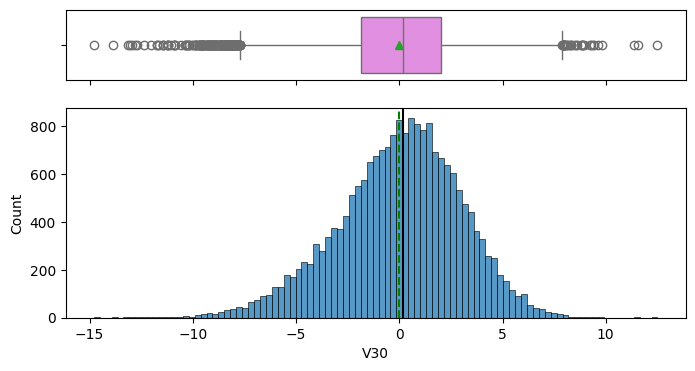

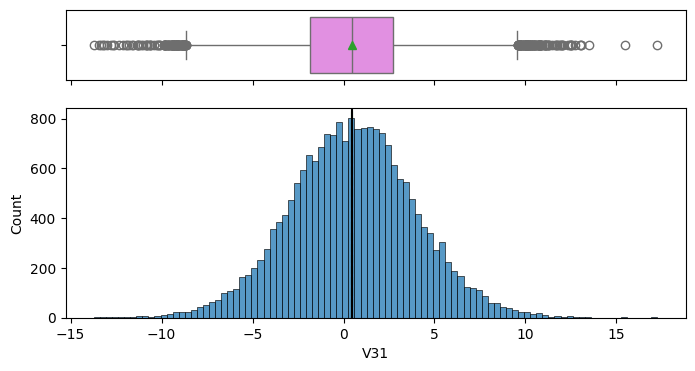

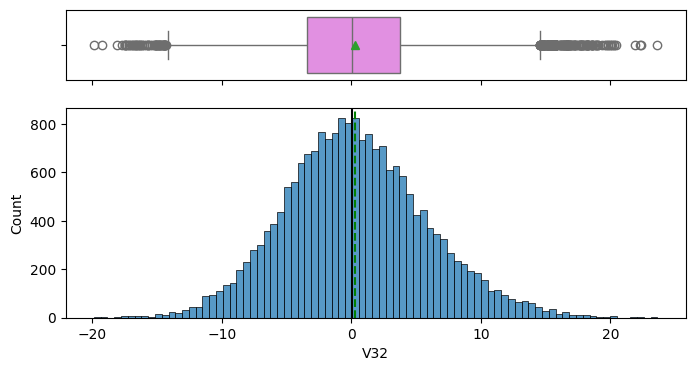

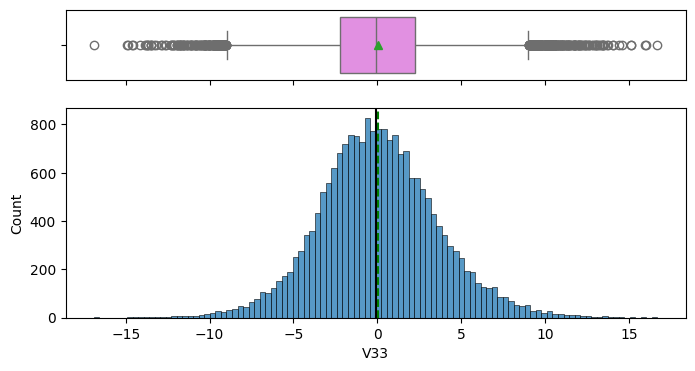

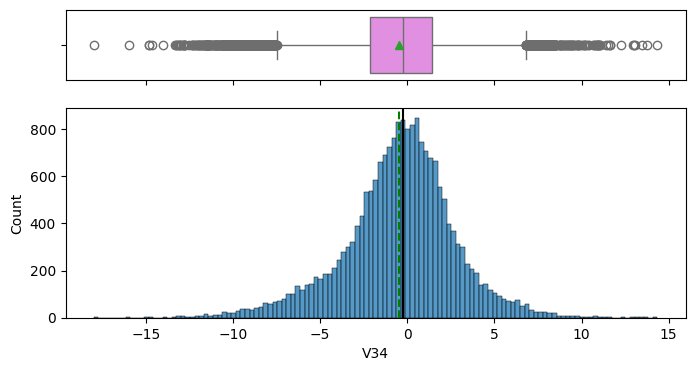

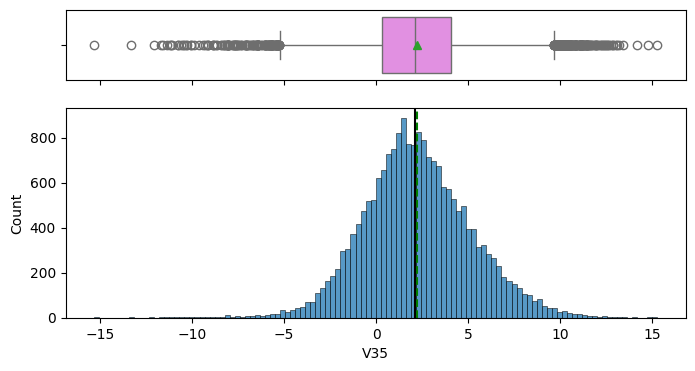

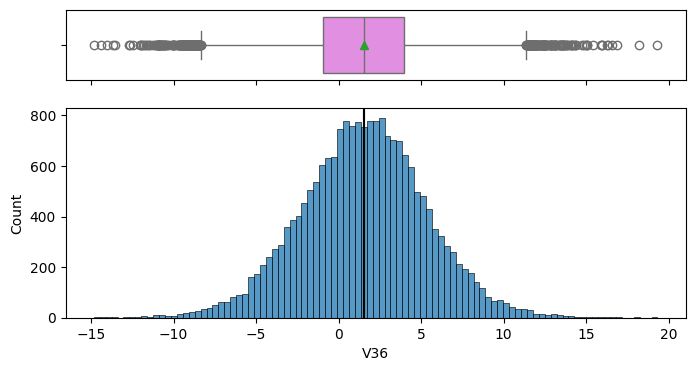

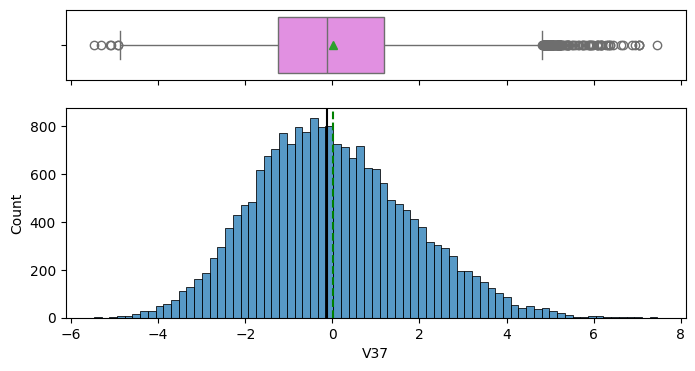

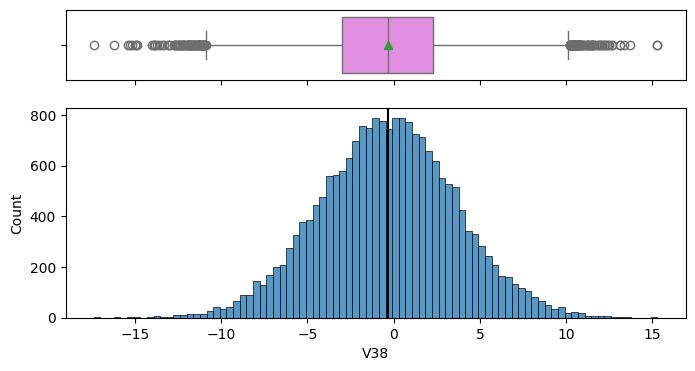

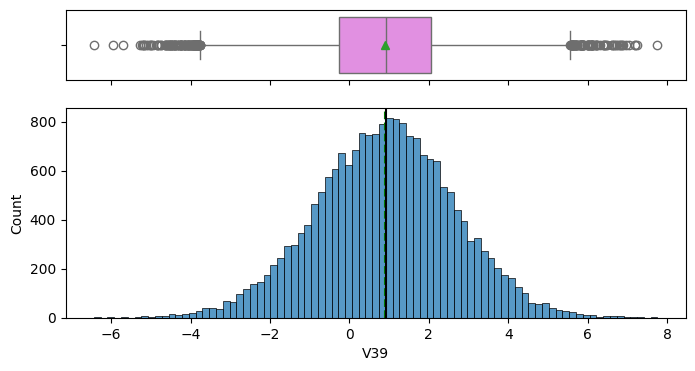

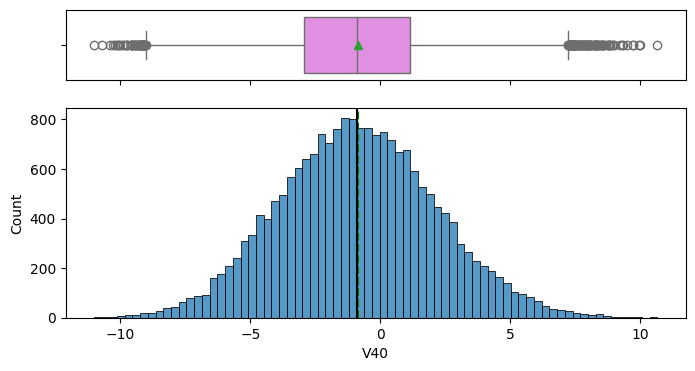

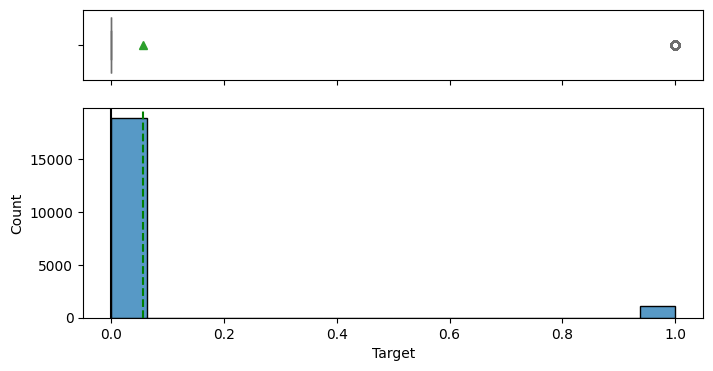

In [26]:
for feature in df_train.columns:
    histogram_boxplot(df_train, feature, figsize=(8,4), kde=False, bins=None)  
    plt.show()

Observations
- The variable show relatively normal distribution but have many outliers
- Since non-linear models are robust to outliers and multicollinearity, the data wont be treated.

### Data PreProcessing¶
- Fill in missing values in both the train and test dataset

In [27]:
## lets compute the mean of the respective column and use it to replace the missing values 
df_train['V1'] = df_train['V1'].fillna(df_train['V1'].mean())
df_train['V2'] = df_train['V2'].fillna(df_train['V1'].mean())

In [28]:
## lets compute the mean of the respective column and use it to replace the missing values 
df_test['V1'] = df_test['V1'].fillna(df_test['V1'].mean())
df_test['V2'] = df_test['V2'].fillna(df_train['V2'].mean())

In [29]:
## Lets confirm to see if there is no missing data for the train set
df_train.isnull().sum()

V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
V29       0
V30       0
V31       0
V32       0
V33       0
V34       0
V35       0
V36       0
V37       0
V38       0
V39       0
V40       0
Target    0
dtype: int64

In [30]:
## Lets confirm to see if there is no missing data for the test set
df_test.isnull().sum()

V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
V29       0
V30       0
V31       0
V32       0
V33       0
V34       0
V35       0
V36       0
V37       0
V38       0
V39       0
V40       0
Target    0
dtype: int64

In [31]:
y_train = df_train['Target']
X_train = df_train.drop(['Target'], axis=1)

y_test = df_test['Target']
X_test = df_test.drop(['Target'], axis=1)

### Data Standardization
Perform data standardization to normalize the features in the dataset

In [32]:
## lets create an instance of the standard scaler
scaler = StandardScaler() 

## fit and transform the features 
scaled_X_train = pd.DataFrame(scaler.fit_transform(X_train))
scaled_X_train.columns = X_train.columns

scaled_X_test = pd.DataFrame(scaler.fit_transform(X_test))
scaled_X_test.columns = X_test.columns

Observations
- The data has successfully been scaled

#### Building A Validation Framework / Splitting Dataset¶
- Shuffle the initial dataset, use seed
- Split your data in train/val with 80%/20% distribution.

In [33]:
## lets split the training data into train set and validation set
X_train, X_valid, y_train, y_valid = train_test_split(scaled_X_train, y_train, test_size=0.2, random_state=11)

print(f"Training Size: {len(X_train)}")
print(f"Validation Size: {len(X_valid)}")

Training Size: 16000
Validation Size: 4000


In [34]:
## lets convert all the target dataframe to 1-D vector array
y_train = y_train.values 
y_valid = y_valid.values
y_test = y_test.values

In [35]:
## convert all features dataframe to numpy matrix array
X_train = X_train.values
X_valid = X_valid.values
X_test = scaled_X_test.values

Observations
- The trainig set now is made of 16000 rows and the validation set is now made up 4000